# Historial Crediticio (3 años)

#### Librerias utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#### Carga de datos

In [2]:
df_credit = pd.read_csv('2_DS_creditos.csv',sep=';')

In [3]:
df_credit.shape

(150000, 12)

In [4]:
df_credit.columns

Index(['ID', 'Default', 'Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],
      dtype='object')

Default: Indicador si el cliente lleva más de 90 sin pagar su préstamo (1=SI, 0=NO)

Prct_uso_to: Porcentaje del uso de tarjeta de crédito en el último mes

Edad: Edad del cliente

Nro_prestao_retrasados: Número de préstamos con retraso en el pago de más de 3 meses en los últimos 3 años

Prct_deuda_vs_ingresos: Ratio de deuda financiera vs ingresos del clientes

Mto_ingreso_mensual: Monto de ingreso mensual

Nro_prod_financieros_deuda: Nro de prestamos (incluido creditos vehiculares o hipotecario) y nro de tarjetas de credito ultimo año

Nro_retraso_60dias: Nro de veces que el cliente se ha retrasado más de 60 dias los últimons 3 años

Nro_creditos_hipotecarios: Nro de creditos hipotecarios

Nro_retraso_ultm3anios: Nro de retrasos en pagos de más de 30 dias en los úlitmos 3 años

Nro_dependiente: Nro de dependientes

In [5]:
df_credit.head()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Se elimina la columna "ID" porque solo indica los indices de los registros.

In [6]:
df_credit.drop(['ID'], axis=1, inplace=True)
df_credit.head()

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 1. Entendimiento de la data




In [7]:
df_credit.groupby('Default').size()

Default
0    139974
1     10026
dtype: int64

In [8]:
df_credit['Default'].unique()

array([1, 0])

#### 1.1 Valores Nulos

In [9]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Default                     150000 non-null  int64  
 1   Prct_uso_tc                 150000 non-null  float64
 2   Edad                        150000 non-null  int64  
 3   Nro_prestao_retrasados      150000 non-null  int64  
 4   Prct_deuda_vs_ingresos      150000 non-null  float64
 5   Mto_ingreso_mensual         120269 non-null  float64
 6   Nro_prod_financieros_deuda  150000 non-null  int64  
 7   Nro_retraso_60dias          150000 non-null  int64  
 8   Nro_creditos_hipotecarios   150000 non-null  int64  
 9   Nro_retraso_ultm3anios      150000 non-null  int64  
 10  Nro_dependiente             146076 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [10]:
df_credit.isna().sum()

Default                           0
Prct_uso_tc                       0
Edad                              0
Nro_prestao_retrasados            0
Prct_deuda_vs_ingresos            0
Mto_ingreso_mensual           29731
Nro_prod_financieros_deuda        0
Nro_retraso_60dias                0
Nro_creditos_hipotecarios         0
Nro_retraso_ultm3anios            0
Nro_dependiente                3924
dtype: int64

Existen valores nules en las variables: Mto_ingreso_mensual y Nro_dependiente.


---

pero que no representán más del 20% del total de datos, igualmente analizaremos los campos nulos por si existe alguna relación entre las variables.

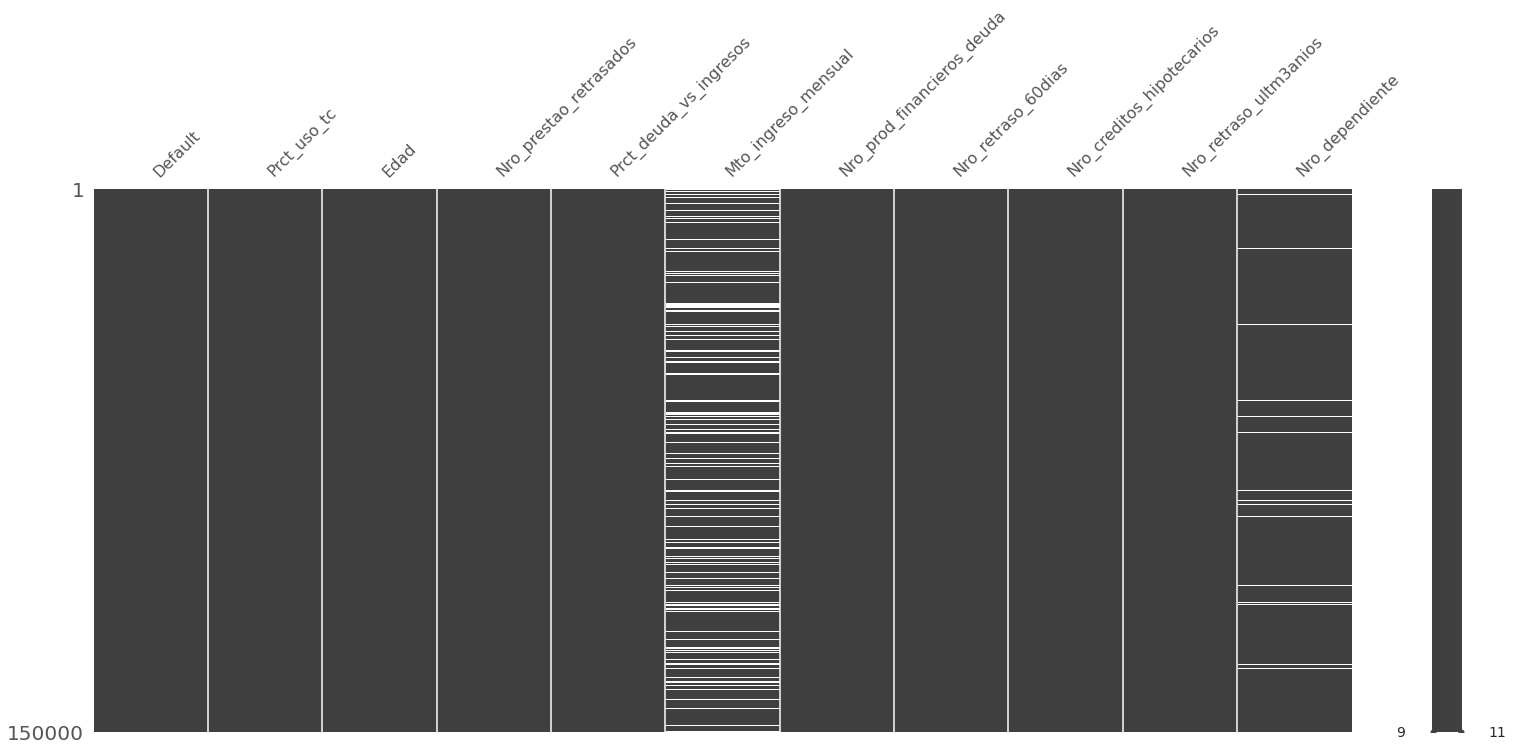

In [11]:
import missingno as msno
msno.matrix(df_credit)

No hay relación entre las variables con nulos: Mto_ingreso_mensual y Nro_dependiente.

Para la variable "Mto_ingreso_mensual" los valores nulos podrían ser 0, por ejemplo en el caso de una persona desempleada.
Pero los valores de la variable "Prct_deuda_vs_ingresos" es diferente de 0 cuando son nulos los ingresos del cliente.

En el caso de la variable "Nro_dependiente" también sería posible, ya que podrían ser casos de clientes sin dependientes.

#### 1.2. Variable Target

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<bound method Series.sort_index of 0    139974
1     10026
Name: Default, dtype: int64>

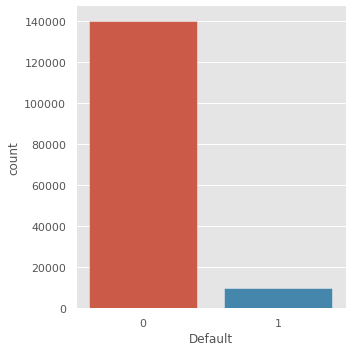

In [12]:
sns.factorplot('Default',data=df_credit,kind="count")
df_credit['Default'].value_counts().sort_index

Aproximadamente el 6% de los clientes tienen más de 90 días sin pagar su préstamo.

#### 1.3 Variables Cuantitativas

1.3.1 Medidas Estadísticas

In [13]:
df_credit.describe()

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Analizamos las variables numéricas donde podemos observar que existen posibles valores atípicos en gran medida son "Prct_uso_tc", "Prct_deuda_vs_ingresos", "Mto_ingreso_mensual" y en menor medida en "Nro_prestao_retrasados", "Nro_retraso_60dias", "Nro_creditos_hipotecarios",  "Nro_retraso_ultm3anios" y "Nro_dependiente" .

Los valores de las variables "Nro_prestao_retrasados", "Nro_retraso_60dias" y "Nro_retraso_ultm3anios" se observa que son similares, y se podría decir que están relacionadas de forma directa.

In [14]:
df_credit[["Nro_prestao_retrasados", "Nro_retraso_60dias", "Nro_retraso_ultm3anios" ]].head(50)

,Nro_prestao_retrasados,Nro_retraso_60dias,Nro_retraso_ultm3anios
0,2,0,0
1,0,0,0
2,1,1,0
3,0,0,0
4,1,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [15]:
Variables = ['Prct_uso_tc','Edad','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Nro_prod_financieros_deuda','Nro_retraso_60dias', 'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios', 'Nro_dependiente']
#Variables = ['Prct_uso_tc','Edad','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Nro_prod_financieros_deuda', 'Nro_creditos_hipotecarios', 'Nro_dependiente']

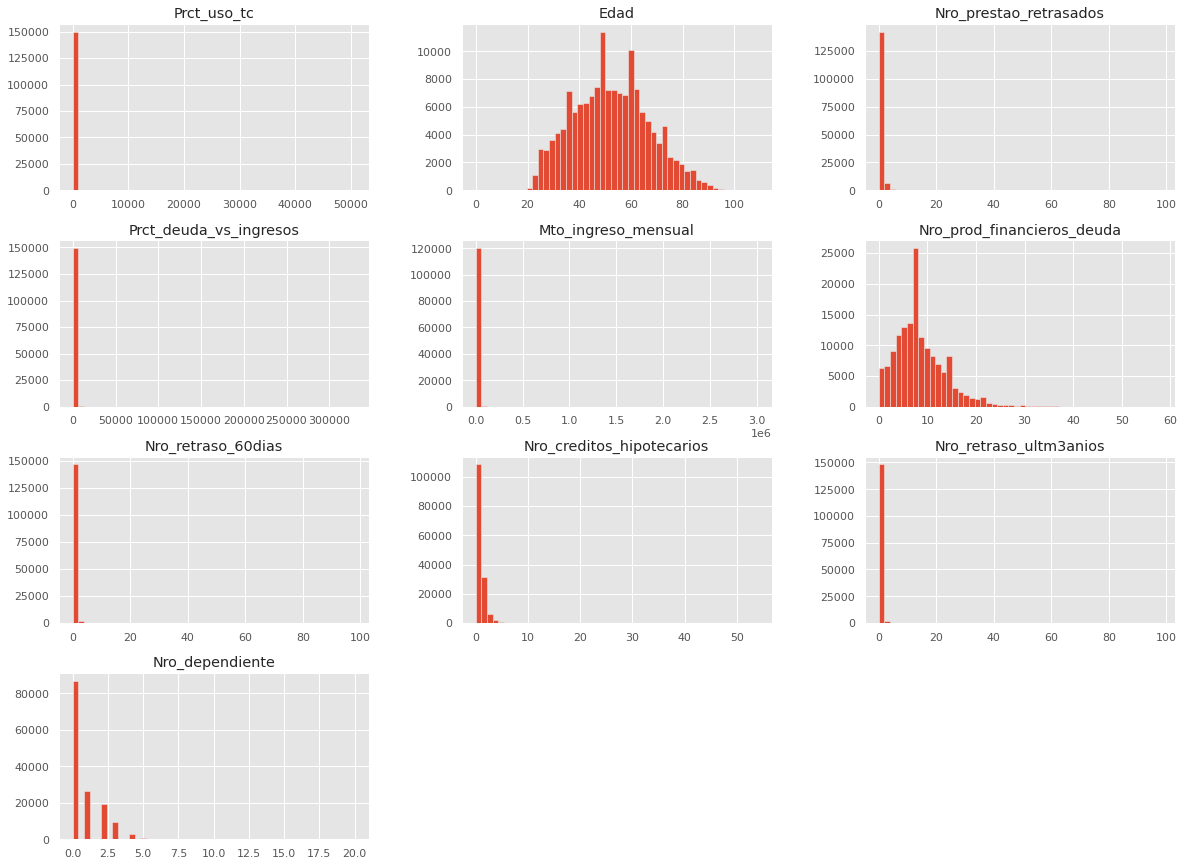

In [16]:
df_credit[Variables].hist(bins = 50, figsize=(20,15))
plt.show()

1.3.2. Correlaciones

In [17]:
Variables = ['Prct_uso_tc','Edad','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Nro_prod_financieros_deuda','Nro_retraso_60dias', 'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios', 'Nro_dependiente','Default']
#Variables = ['Prct_uso_tc','Edad','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Nro_prod_financieros_deuda', 'Nro_creditos_hipotecarios', 'Nro_dependiente','Default']

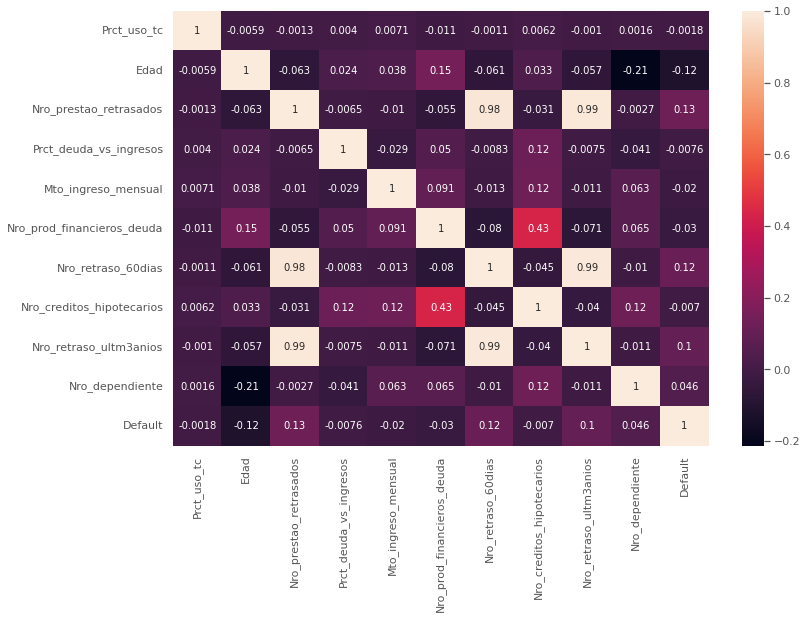

In [18]:
corr = df_credit[Variables].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

Hay correlación directa del Target(Default) con "Nro_prestao_retrasados","Nro_retraso_60dias" y "Nro_retraso_ultm3anios" e inversa con "Edad".

Variables Cualitativas

In [19]:
df_credit.groupby('Edad').size()

Edad
0        1
21     183
22     434
23     641
24     816
      ... 
102      3
103      3
105      1
107      1
109      2
Length: 86, dtype: int64

In [20]:
df_credit.groupby('Nro_dependiente').size()

Nro_dependiente
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

En la variable "Edad" hay un registro igual a 0, lo cual sería imposible o un valor atípico.

Por eso se aplicará un cambio para pasarlo como variable categórica. 

In [21]:
# Mapping edad de los clientes del Banco
df_credit.loc[ df_credit['Edad'] <= 21, 'Edad'] 					       = 0
df_credit.loc[(df_credit['Edad'] > 21) & (df_credit['Edad'] <= 40), 'Edad'] = 1
df_credit.loc[(df_credit['Edad'] > 40) & (df_credit['Edad'] <= 60), 'Edad'] = 2
df_credit.loc[(df_credit['Edad'] > 60) & (df_credit['Edad'] <= 80), 'Edad'] = 3
df_credit.loc[ df_credit['Edad'] > 80, 'Edad'] = 4

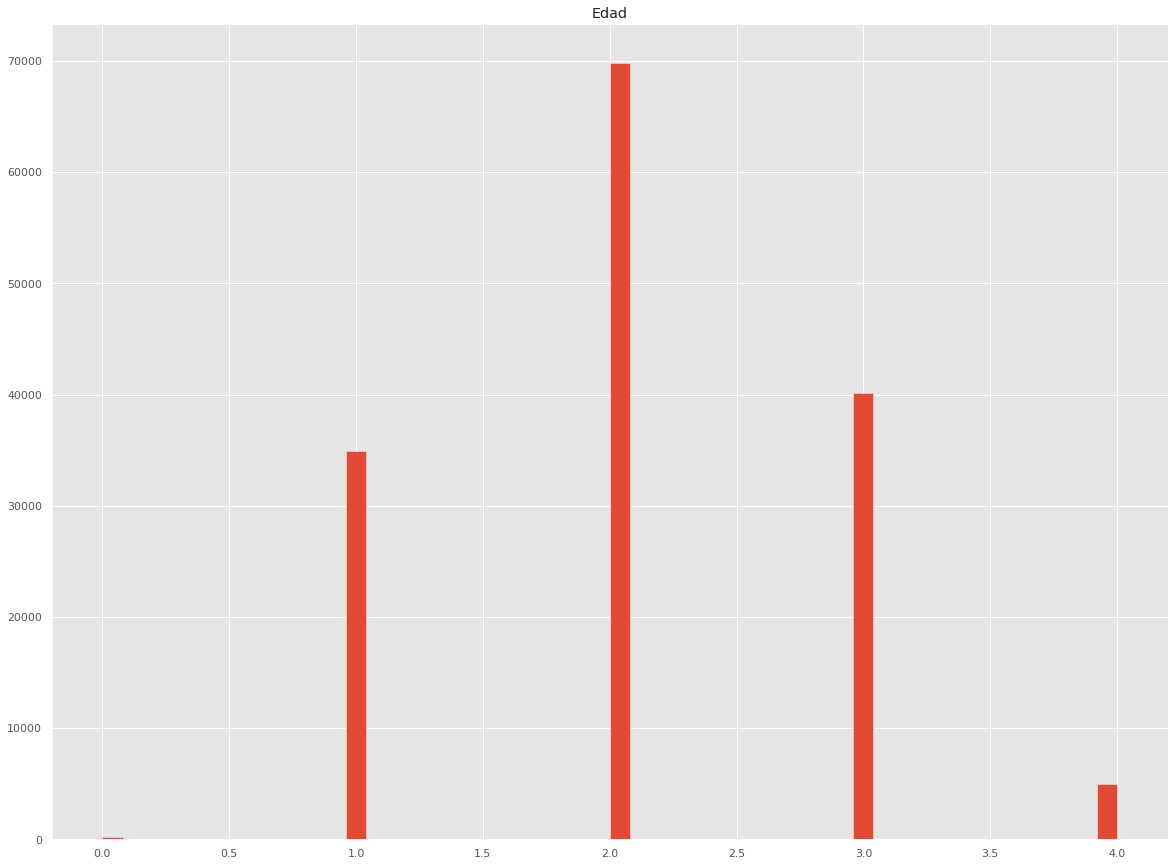

In [22]:
df_credit[['Edad']].hist(bins = 50, figsize=(20,15))
plt.show()

El cambio se hizo de tal manera que no pierda la simetría con los datos iniciales que tenía.

También se cambiará la variable 'Nro_dependiente' porque se encuentra más valores en los registros de 0 que en los demás.
Por eso se tomará solo 2 niveles:

*   0 : Cliente con dependientes
*   1 : Cliente con más de 1 dependiente

Para evitar la alta dispersión.

In [23]:
# Mapping Nro_dependiente de los clientes del Banco
df_credit.loc[ df_credit['Nro_dependiente'] == 0, 'Nro_dependiente'] = 0
df_credit.loc[ df_credit['Nro_dependiente'] > 0, 'Nro_dependiente'] = 1

In [24]:
categorical_attributes = df_credit[['Edad','Nro_dependiente']]

<bound method Series.sort_index of 2    0.465620
3    0.267493
1    0.232753
4    0.032907
0    0.001227
Name: Edad, dtype: float64>

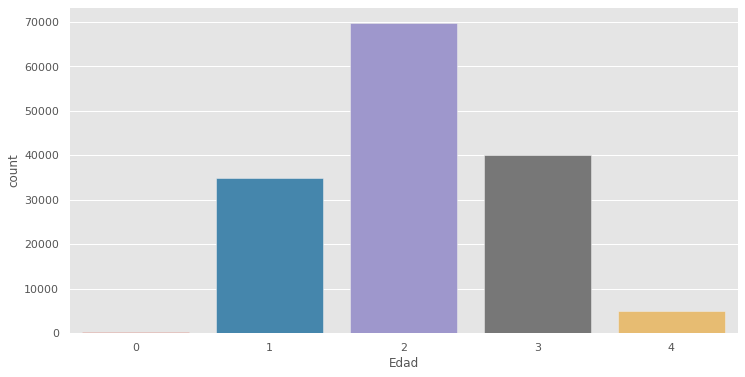

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "Edad")
df_credit['Edad'].value_counts(1).sort_index

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Default                
       count   sum      mean
Edad                        
0        184    13  0.070652
1      34913  3621  0.103715
2      69843  5042  0.072190
3      40124  1250  0.031153
4       4936   100  0.020259

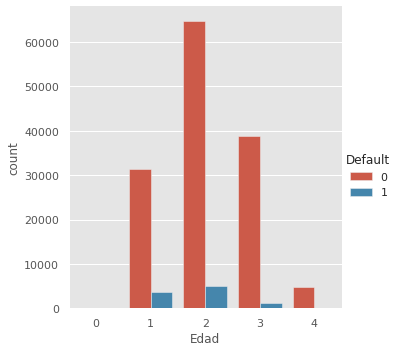

In [26]:
sns.factorplot('Edad',data=df_credit,hue='Default',kind="count")
df_credit[['Edad', 'Default']].groupby(['Edad'], as_index=False).agg(['count','sum','mean'])

Los clientes con edades de nivel 1 (>21 y <=40) tiene el 10% de casos del total de observaciones.

<bound method Series.sort_index of 0.0    0.594909
1.0    0.405091
Name: Nro_dependiente, dtype: float64>

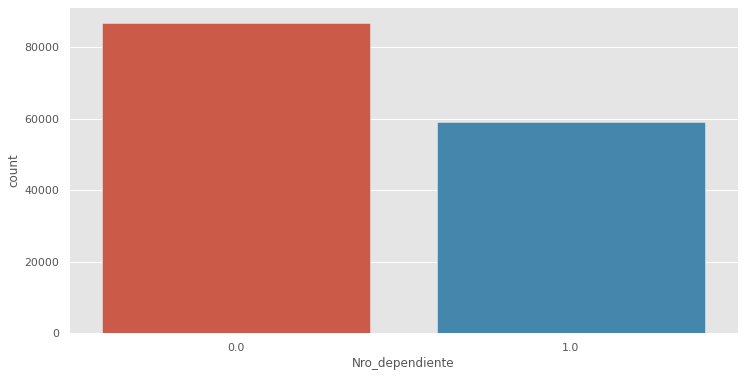

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "Nro_dependiente")
df_credit['Nro_dependiente'].value_counts(1).sort_index

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Default                
                  count   sum      mean
Nro_dependiente                        
0.0               86902  5095  0.058629
1.0               59174  4752  0.080306

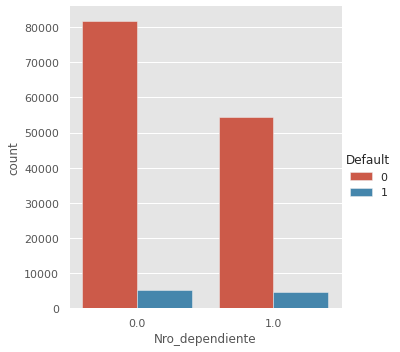

In [28]:
sns.factorplot('Nro_dependiente',data=df_credit,hue='Default',kind="count")
df_credit[['Nro_dependiente', 'Default']].groupby(['Nro_dependiente'], as_index=False).agg(['count','sum','mean'])

En ambas variables 'Edad' y 'Nro_dependiente' la proporción para los casos de clientes que tienen más de 90 días sin pagar su préstamo, es mayor y menor que el 6% que se obtiene tomando todas las variables.

## 2. Tratamiento de Datos

In [29]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Default                     150000 non-null  int64  
 1   Prct_uso_tc                 150000 non-null  float64
 2   Edad                        150000 non-null  int64  
 3   Nro_prestao_retrasados      150000 non-null  int64  
 4   Prct_deuda_vs_ingresos      150000 non-null  float64
 5   Mto_ingreso_mensual         120269 non-null  float64
 6   Nro_prod_financieros_deuda  150000 non-null  int64  
 7   Nro_retraso_60dias          150000 non-null  int64  
 8   Nro_creditos_hipotecarios   150000 non-null  int64  
 9   Nro_retraso_ultm3anios      150000 non-null  int64  
 10  Nro_dependiente             146076 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


Imputando los nulos:

Se imputara con la mediana a la variable "Mto_ingreso_mensual" porque en la variable "Prct_deuda_vs_ingresos" si se tiene registros en esos casos y 0 a la variable "Nro_dependiente", porque es un caso posible de cliente sin dependientes.

In [30]:
df_credit['Mto_ingreso_mensual'].fillna(df_credit['Mto_ingreso_mensual'].median(), inplace=True)

In [31]:
df_credit['Nro_dependiente'].fillna(0, inplace=True)

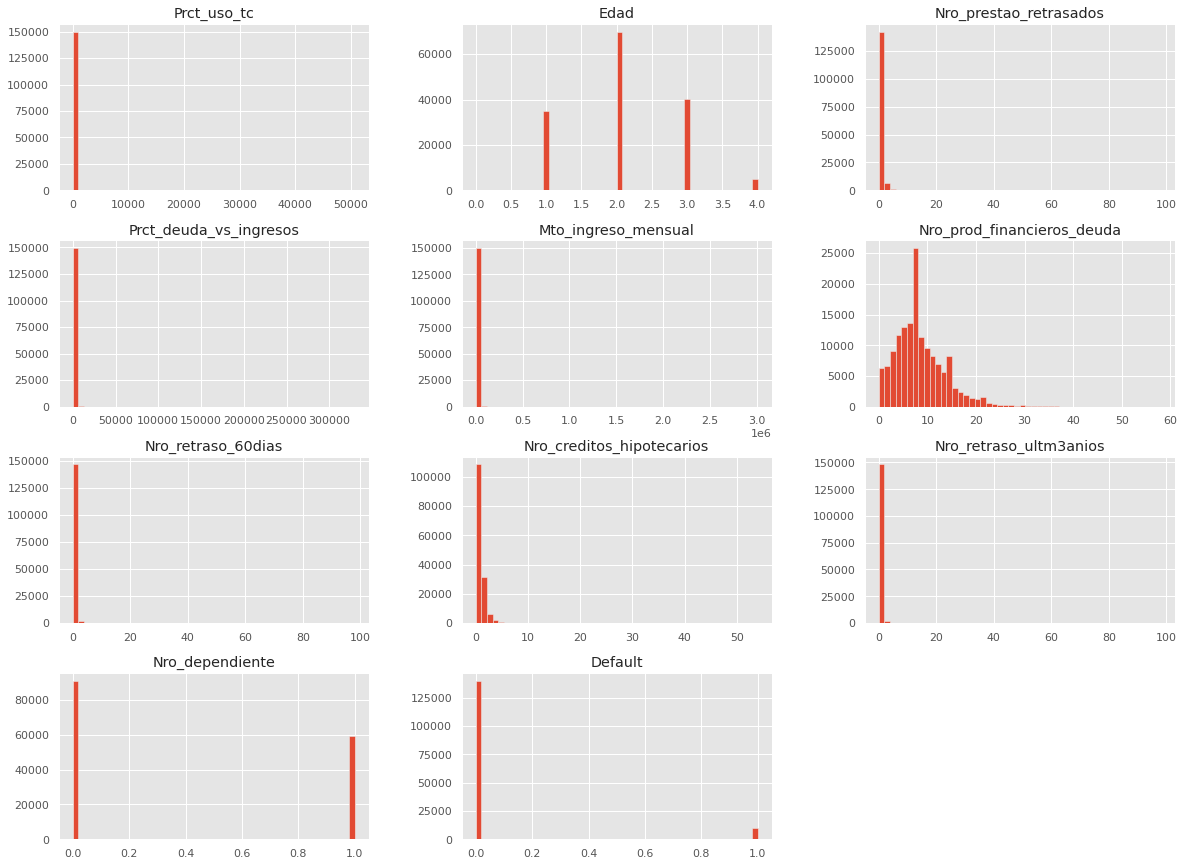

In [32]:
df_credit[Variables].hist(bins = 50, figsize=(20,15))
plt.show()

Identificando valores atipicos

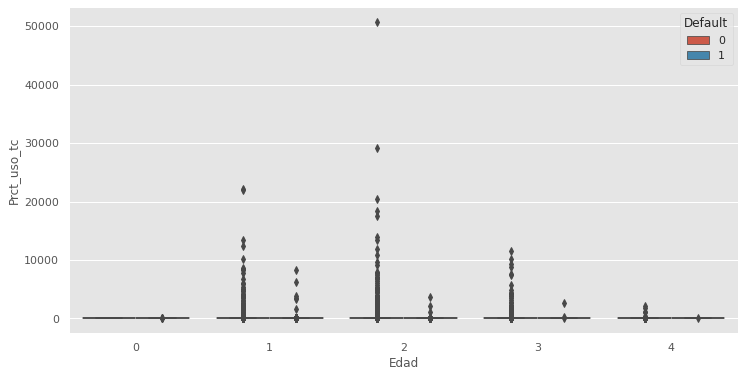

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Edad",y="Prct_uso_tc", hue="Default", data=df_credit)

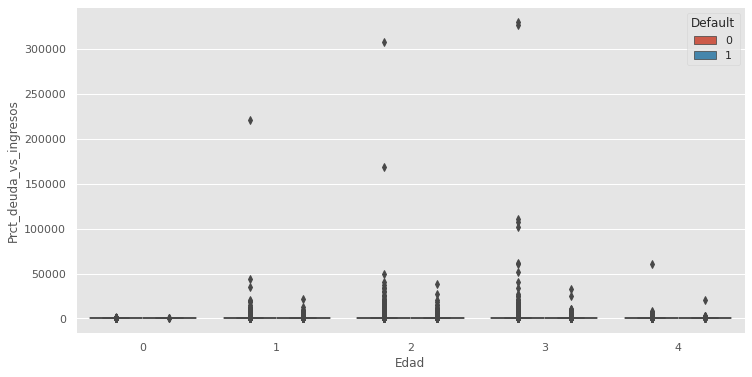

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Edad",y="Prct_deuda_vs_ingresos", hue="Default", data=df_credit)

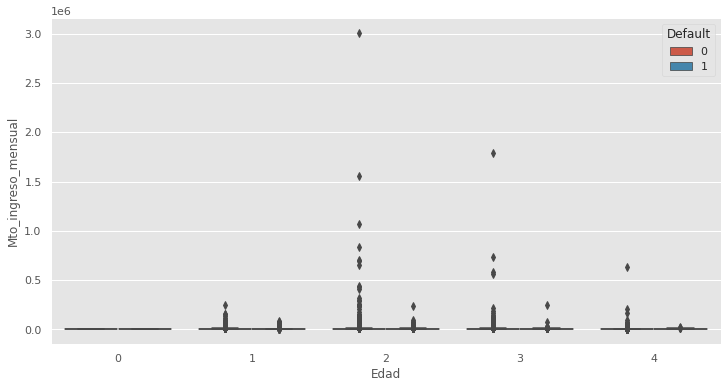

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Edad",y="Mto_ingreso_mensual", hue="Default", data=df_credit)

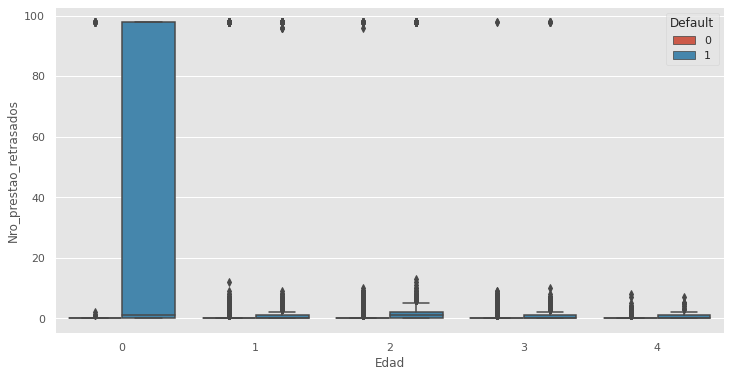

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Edad",y="Nro_prestao_retrasados", hue="Default", data=df_credit)

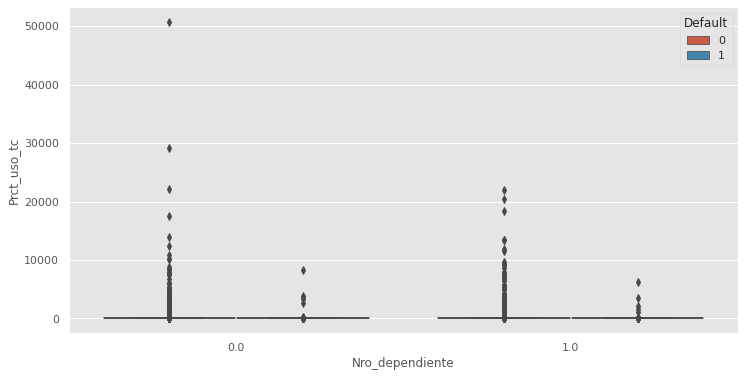

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Nro_dependiente",y="Prct_uso_tc", hue="Default", data=df_credit)

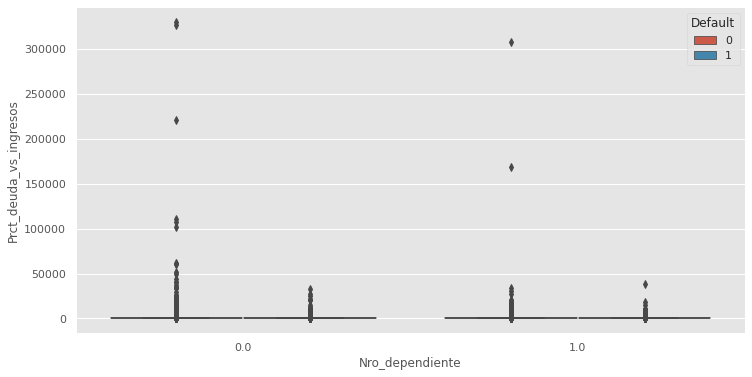

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Nro_dependiente",y="Prct_deuda_vs_ingresos", hue="Default", data=df_credit)

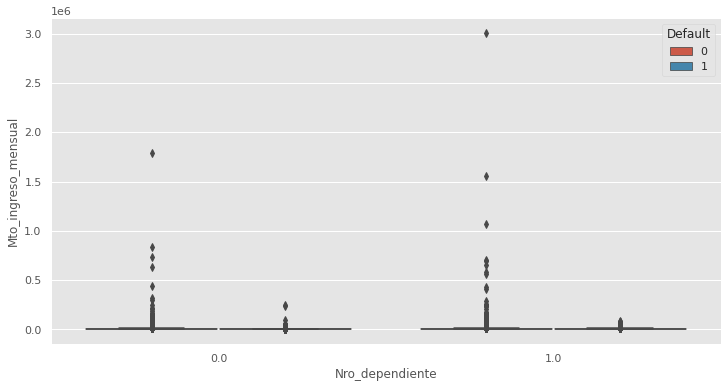

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Nro_dependiente",y="Mto_ingreso_mensual", hue="Default", data=df_credit)

Como se observa en los gráficos los valores atípicos se encuentran en la parte superior.

Por eso se aplicará una imputación topeando al percentil 95 para la variable "Prct_uso_tc" y al percentil 90 para la variable "Mto_ingreso_mensual"

In [40]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    
    return(x)

In [41]:
def outlier_capping_2(x):
    x = x.clip(upper=x.quantile(0.90))
    
    return(x)

In [42]:
def outlier_capping_3(x):
    x = x.clip(upper=x.quantile(0.80))
    
    return(x)

In [43]:
df_credit_tratamiento = df_credit[['Prct_uso_tc']].apply(lambda x: outlier_capping(x))

In [44]:
df_credit = pd.concat([df_credit.drop(columns=['Prct_uso_tc']), df_credit_tratamiento], axis=1,)

In [45]:
df_credit.describe()

,Default,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,2.098100,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.394493,0.319196
std,0.249746,0.791935,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,0.488743,0.349481
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.029867
50%,0.000000,2.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.154181
75%,0.000000,3.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.559046
max,1.000000,4.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,1.000000,1.000000


In [46]:
df_credit_tratamiento = df_credit[['Prct_deuda_vs_ingresos']].apply(lambda x: outlier_capping_3(x))

In [47]:
df_credit = pd.concat([df_credit.drop(columns=['Prct_deuda_vs_ingresos']), df_credit_tratamiento], axis=1,)

In [48]:
df_credit.describe()

,Default,Edad,Nro_prestao_retrasados,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc,Prct_deuda_vs_ingresos
count,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,2.098100,0.421033,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.394493,0.319196,1.088061
std,0.249746,0.791935,4.192781,1.289040e+04,5.145951,4.169304,1.129771,4.155179,0.488743,0.349481,1.494620
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.029867,0.175074
50%,0.000000,2.000000,0.000000,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.154181,0.366508
75%,0.000000,3.000000,0.000000,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.559046,0.868254
max,1.000000,4.000000,98.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,1.000000,1.000000,4.000000


In [49]:
df_credit_tratamiento = df_credit[['Mto_ingreso_mensual']].apply(lambda x: outlier_capping_2(x))

In [50]:
df_credit = pd.concat([df_credit.drop(columns=['Mto_ingreso_mensual']), df_credit_tratamiento], axis=1,)

In [51]:
df_credit.describe()

,Default,Edad,Nro_prestao_retrasados,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc,Prct_deuda_vs_ingresos,Mto_ingreso_mensual
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,2.098100,0.421033,8.452760,0.265973,1.018240,0.240387,0.394493,0.319196,1.088061,5726.755347
std,0.249746,0.791935,4.192781,5.145951,4.169304,1.129771,4.155179,0.488743,0.349481,1.494620,2742.153416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.029867,0.175074,3903.000000
50%,0.000000,2.000000,0.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.154181,0.366508,5400.000000
75%,0.000000,3.000000,0.000000,11.000000,0.000000,2.000000,0.000000,1.000000,0.559046,0.868254,7400.000000
max,1.000000,4.000000,98.000000,58.000000,98.000000,54.000000,98.000000,1.000000,1.000000,4.000000,10750.000000


In [52]:
df_credit_tratamiento = df_credit[['Nro_prestao_retrasados']].apply(lambda x: outlier_capping_2(x))

In [53]:
df_credit = pd.concat([df_credit.drop(columns=['Nro_prestao_retrasados']), df_credit_tratamiento], axis=1,)

In [54]:
df_credit.describe()

,Default,Edad,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prestao_retrasados
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,2.098100,8.452760,0.265973,1.018240,0.240387,0.394493,0.319196,1.088061,5726.755347,0.159880
std,0.249746,0.791935,5.145951,4.169304,1.129771,4.155179,0.488743,0.349481,1.494620,2742.153416,0.366496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.029867,0.175074,3903.000000,0.000000
50%,0.000000,2.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.154181,0.366508,5400.000000,0.000000
75%,0.000000,3.000000,11.000000,0.000000,2.000000,0.000000,1.000000,0.559046,0.868254,7400.000000,0.000000
max,1.000000,4.000000,58.000000,98.000000,54.000000,98.000000,1.000000,1.000000,4.000000,10750.000000,1.000000


In [55]:
df_credit_tratamiento = df_credit[['Nro_retraso_60dias']].apply(lambda x: outlier_capping(x))

In [56]:
df_credit = pd.concat([df_credit.drop(columns=['Nro_retraso_60dias']), df_credit_tratamiento], axis=1,)

In [57]:
df_credit.describe()

,Default,Edad,Nro_prod_financieros_deuda,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prestao_retrasados,Nro_retraso_60dias
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,2.098100,8.452760,1.018240,0.240387,0.394493,0.319196,1.088061,5726.755347,0.159880,0.055587
std,0.249746,0.791935,5.145951,1.129771,4.155179,0.488743,0.349481,1.494620,2742.153416,0.366496,0.229123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.029867,0.175074,3903.000000,0.000000,0.000000
50%,0.000000,2.000000,8.000000,1.000000,0.000000,0.000000,0.154181,0.366508,5400.000000,0.000000,0.000000
75%,0.000000,3.000000,11.000000,2.000000,0.000000,1.000000,0.559046,0.868254,7400.000000,0.000000,0.000000
max,1.000000,4.000000,58.000000,54.000000,98.000000,1.000000,1.000000,4.000000,10750.000000,1.000000,1.000000


In [58]:
df_credit_tratamiento = df_credit[['Nro_retraso_ultm3anios']].apply(lambda x: outlier_capping(x))

In [59]:
df_credit = pd.concat([df_credit.drop(columns=['Nro_retraso_ultm3anios']), df_credit_tratamiento], axis=1,)

In [60]:
df_credit.describe()

,Default,Edad,Nro_prod_financieros_deuda,Nro_creditos_hipotecarios,Nro_dependiente,Prct_uso_tc,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prestao_retrasados,Nro_retraso_60dias,Nro_retraso_ultm3anios
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,2.098100,8.452760,1.018240,0.394493,0.319196,1.088061,5726.755347,0.159880,0.055587,0.050693
std,0.249746,0.791935,5.145951,1.129771,0.488743,0.349481,1.494620,2742.153416,0.366496,0.229123,0.219371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,5.000000,0.000000,0.000000,0.029867,0.175074,3903.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,8.000000,1.000000,0.000000,0.154181,0.366508,5400.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,11.000000,2.000000,1.000000,0.559046,0.868254,7400.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,58.000000,54.000000,1.000000,1.000000,4.000000,10750.000000,1.000000,1.000000,1.000000


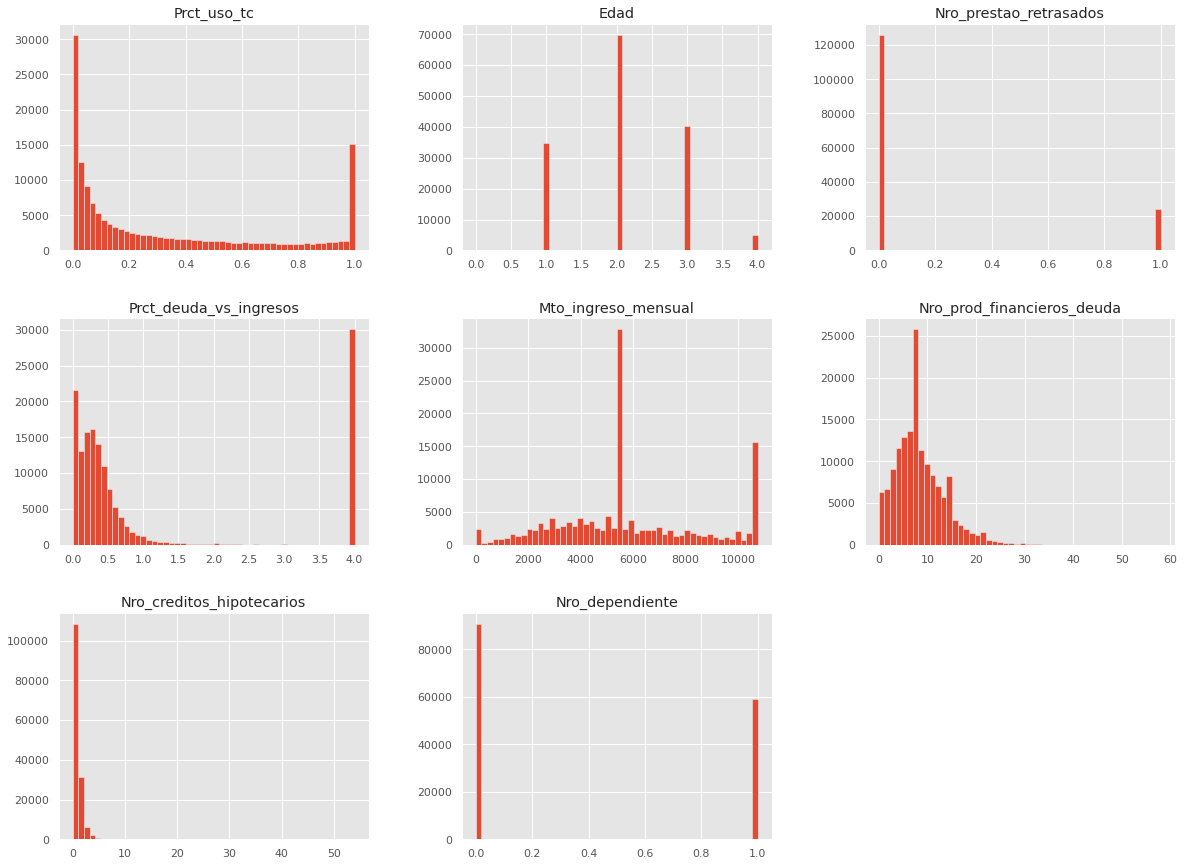

In [61]:
#Variables = ['Prct_uso_tc','Edad','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Nro_prod_financieros_deuda','Nro_retraso_60dias', 'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios', 'Nro_dependiente']
Variables = ['Prct_uso_tc','Edad','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Nro_prod_financieros_deuda', 'Nro_creditos_hipotecarios', 'Nro_dependiente']
df_credit[Variables].hist(bins = 50, figsize=(20,15))
plt.show()

In [62]:
df_credit.describe()

,Default,Edad,Nro_prod_financieros_deuda,Nro_creditos_hipotecarios,Nro_dependiente,Prct_uso_tc,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prestao_retrasados,Nro_retraso_60dias,Nro_retraso_ultm3anios
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,2.098100,8.452760,1.018240,0.394493,0.319196,1.088061,5726.755347,0.159880,0.055587,0.050693
std,0.249746,0.791935,5.145951,1.129771,0.488743,0.349481,1.494620,2742.153416,0.366496,0.229123,0.219371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,5.000000,0.000000,0.000000,0.029867,0.175074,3903.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,8.000000,1.000000,0.000000,0.154181,0.366508,5400.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,11.000000,2.000000,1.000000,0.559046,0.868254,7400.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,58.000000,54.000000,1.000000,1.000000,4.000000,10750.000000,1.000000,1.000000,1.000000


Despúes de imputar topeando el percentil 95, 90 y 80 respectivamente se observa que han disminuido los valores atípicos.

Se imputo con percentl 80 la variable "Prc_deuda_vs_ingresos", porque hasta el percentil 85 seguia presentando valores atípicos en gran medida.

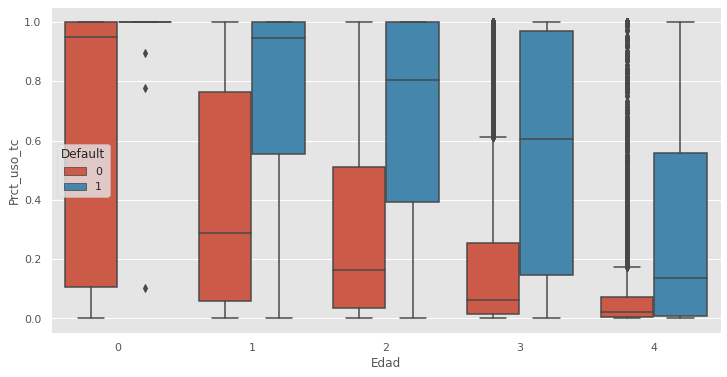

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Edad",y="Prct_uso_tc", hue="Default", data=df_credit)

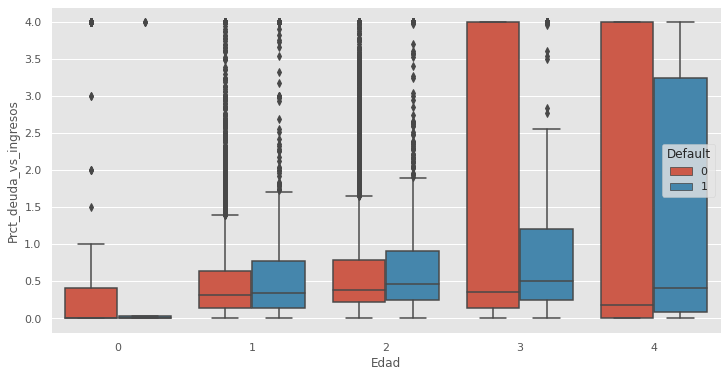

In [64]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Edad",y="Prct_deuda_vs_ingresos", hue="Default", data=df_credit)

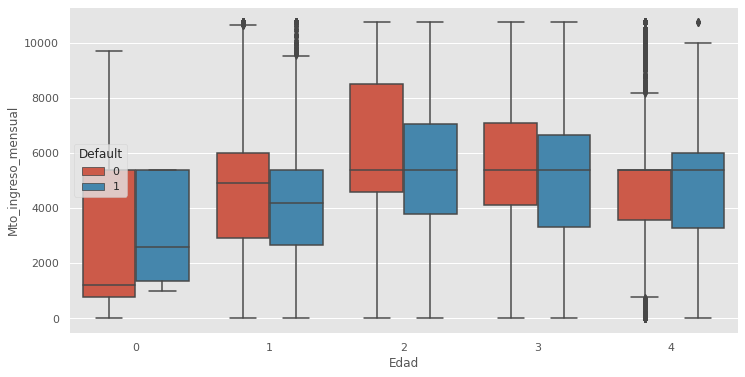

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Edad",y="Mto_ingreso_mensual", hue="Default", data=df_credit)

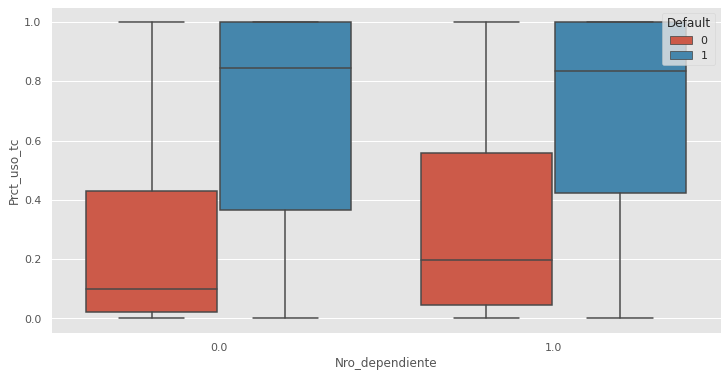

In [66]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Nro_dependiente",y="Prct_uso_tc", hue="Default", data=df_credit)

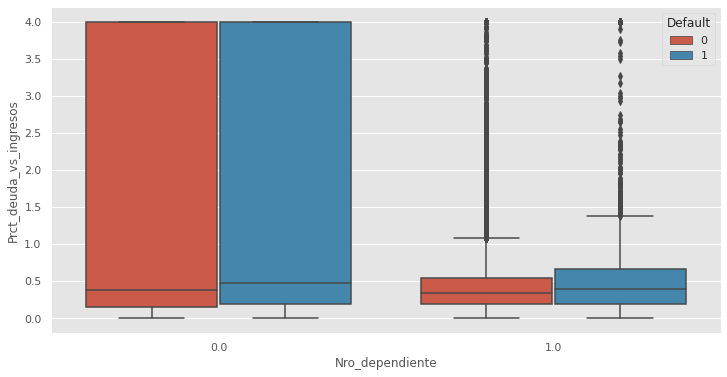

In [67]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Nro_dependiente",y="Prct_deuda_vs_ingresos", hue="Default", data=df_credit)

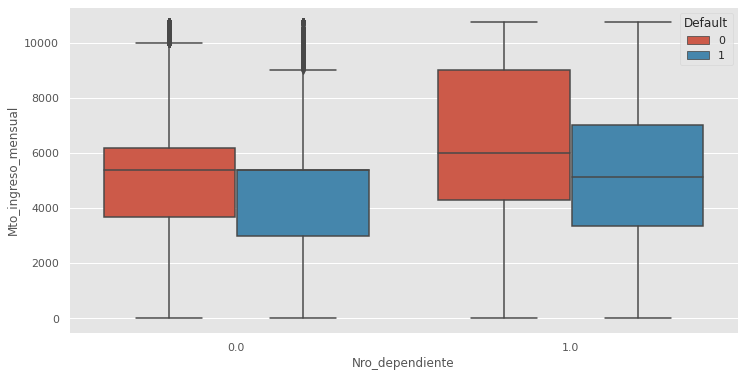

In [68]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Nro_dependiente",y="Mto_ingreso_mensual", hue="Default", data=df_credit)

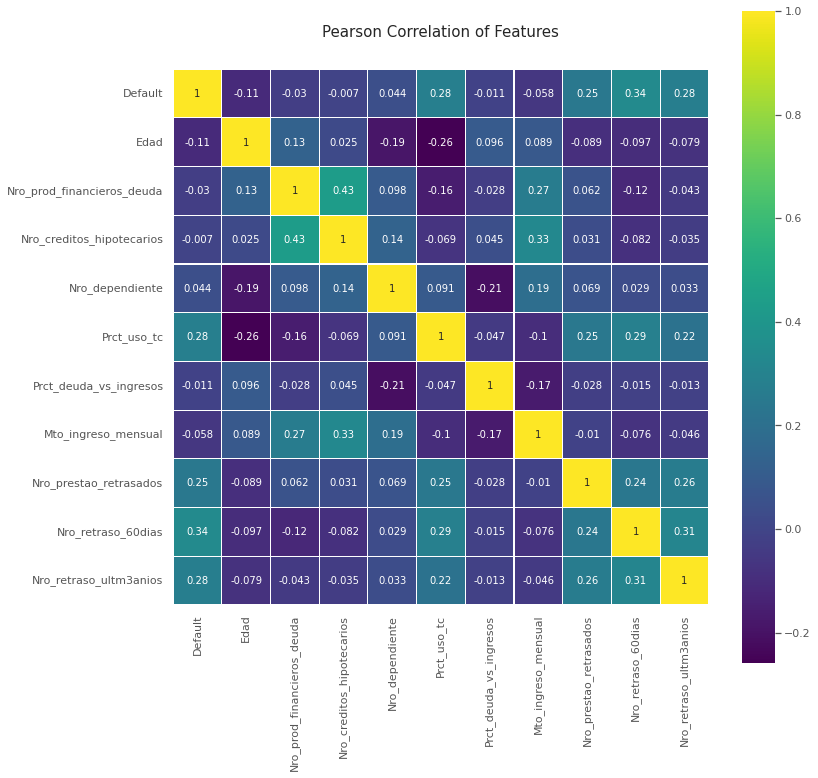

In [69]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [70]:
from sklearn.feature_selection import SelectKBest

In [71]:
X=df_credit.drop(['Default'], axis=1)
y=df_credit['Default']

best=SelectKBest(k=3)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Prct_uso_tc', 'Nro_retraso_60dias', 'Nro_retraso_ultm3anios'], dtype='object')


## 3. Balanceo de Datos

In [72]:
# Detección del desbalance de la muestras
target_count = df_credit.Default.value_counts()
target_count

0    139974
1     10026
Name: Default, dtype: int64

Class 0 Pago: 139974
Class 1 Sin Pagar: 10026
Proporción: 13.96 : 1


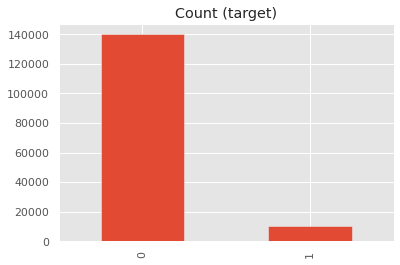

In [73]:
# Detección del desbalance de la muestras
target_count = df_credit.Default.value_counts()
print('Class 0 Pago:', target_count[0])
print('Class 1 Sin Pagar:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

In [74]:
# Seleccionaremos un 35% de los datos para estrudiar el beneficio de las estretgias de muestreo

X = df_credit[['Prct_uso_tc','Edad','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Nro_prod_financieros_deuda','Nro_retraso_60dias', 'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios', 'Nro_dependiente']]
#X = df_credit[['Prct_uso_tc','Edad','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Nro_prod_financieros_deuda', 'Nro_creditos_hipotecarios', 'Nro_dependiente']]
y = df_credit[['Default']]

#np.random.seed(101)
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)

In [75]:
# Solo utilizaremos Datos de entrenamiento para la estrategia 
df_train = pd.concat([X_train,y_train],axis=1)

In [76]:
#División entre máquinas con intensidad de pico
count_class_0, count_class_1 = df_train.Default.value_counts()

# Divide by class
df_class_0 = df_train[df_train['Default'] == 0]
df_class_1 = df_train[df_train['Default'] == 1]

In [77]:
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(90979, 90979, 6521, 6521)

Oversampling

In [78]:
aux = df_class_1.head(2)
aux.sample(4,replace=True)

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Default
12969,1.000000,2,1.0,0.716269,1800.0,6,1.0,0,0.0,0.0,1
12969,1.000000,2,1.0,0.716269,1800.0,6,1.0,0,0.0,0.0,1
12969,1.000000,2,1.0,0.716269,1800.0,6,1.0,0,0.0,0.0,1
88493,0.848693,1,1.0,0.155903,3777.0,3,1.0,0,0.0,0.0,1


Random over-sampling:
0    90979
1    90979
Name: Default, dtype: int64


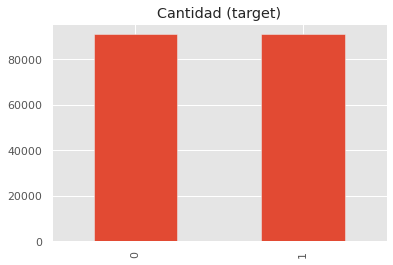

In [79]:
# hay un riesgo de que algunas filas no sean consideradas porque la aletoriedad las ignorara
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.Default.value_counts())

df_train_over.Default.value_counts().plot(kind='bar', title='Cantidad (target)');

UnderSampling

In [80]:
df_class_0.sample(3)

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Default
132909,0.755354,1,0.0,0.228195,5766.0,8,0.0,1,0.0,0.0,0
121409,0.432197,2,0.0,0.438063,5989.0,9,0.0,1,0.0,1.0,0
799,0.045649,1,0.0,0.274952,4167.0,21,0.0,1,0.0,0.0,0


Estrategia de Muestreo under-sampling:
0    6521
1    6521
Name: Default, dtype: int64


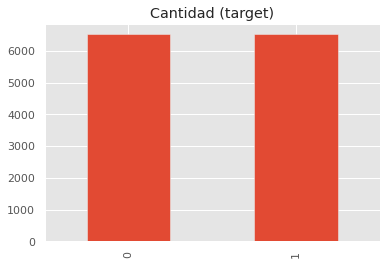

In [81]:
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Estrategia de Muestreo under-sampling:')
print(df_train_under.Default.value_counts())

df_train_under.Default.value_counts().plot(kind='bar', title='Cantidad (target)');

In [82]:
df_train.groupby('Default').size() #Original

Default
0    90979
1     6521
dtype: int64

In [83]:
df_train_over.groupby('Default').size() #Oversampling

Default
0    90979
1    90979
dtype: int64

In [84]:
df_train_under.groupby('Default').size() #Undersampling

Default
0    6521
1    6521
dtype: int64

### **Evaluación de resultados de las estrategias de muestreo**

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy DATOS ORIGINALES: 89.79%
Log Loss: 3.5262866355357834


Matriz de Confusión - DATOS ORIGINALES:
 [[46235  2760]
 [ 2600   905]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     48995
           1       0.25      0.26      0.25      3505

    accuracy                           0.90     52500
   macro avg       0.60      0.60      0.60     52500
weighted avg       0.90      0.90      0.90     52500



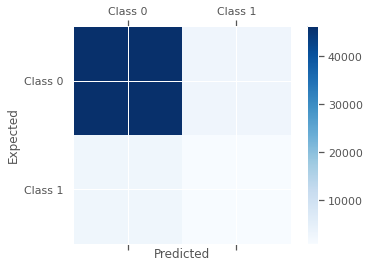

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

OVERSAMPLING

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train_o= df_train_over[['Prct_uso_tc','Edad','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Nro_prod_financieros_deuda','Nro_retraso_60dias', 'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios', 'Nro_dependiente']]
#X_train_o= df_train_over[['Prct_uso_tc','Edad','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Nro_prod_financieros_deuda', 'Nro_creditos_hipotecarios', 'Nro_dependiente']]
y_train_o = df_train_over[['Default']]

model.fit(X_train_o, y_train_o)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING: 89.62%
Log Loss: 3.5848398670033337


Matriz de Confusión OVERSAMPLING:
 [[46118  2877]
 [ 2572   933]]
Métricas de Matriz de Confusión - OVERSAMPLING:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     48995
           1       0.24      0.27      0.26      3505

    accuracy                           0.90     52500
   macro avg       0.60      0.60      0.60     52500
weighted avg       0.90      0.90      0.90     52500



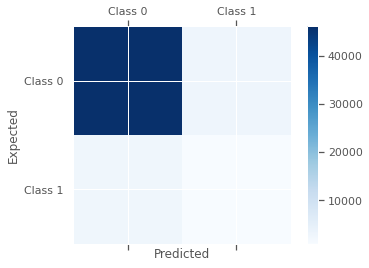

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión OVERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - OVERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

UNDERSAMPLING

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train_u= df_train_under[['Prct_uso_tc','Edad','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Nro_prod_financieros_deuda','Nro_retraso_60dias', 'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios', 'Nro_dependiente']]
#X_train_u= df_train_under[['Prct_uso_tc','Edad','Nro_prestao_retrasados','Prct_deuda_vs_ingresos','Mto_ingreso_mensual','Nro_prod_financieros_deuda', 'Nro_creditos_hipotecarios', 'Nro_dependiente']]
y_train_u = df_train_under[['Default']]

model.fit(X_train_u, y_train_u)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy UNDERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy UNDERSAMPLING: 69.86%
Log Loss: 10.409882898269899


Matriz de Confusión UNDERSAMPLING:
 [[34246 14749]
 [ 1074  2431]]
Métricas de Matriz de Confusión - UNDERSAMPLING:
               precision    recall  f1-score   support

           0       0.97      0.70      0.81     48995
           1       0.14      0.69      0.24      3505

    accuracy                           0.70     52500
   macro avg       0.56      0.70      0.52     52500
weighted avg       0.91      0.70      0.77     52500



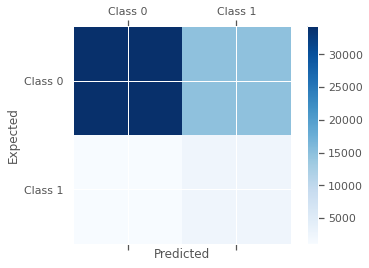

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión UNDERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - UNDERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## 4. Modelado

In [91]:
!pip install xgboost

In [92]:
import xgboost as xgb

In [93]:
model1 = xgb.XGBClassifier() 

In [94]:
model2 = xgb.XGBClassifier(n_estimators=100 , max_depth=5, learning_rate=0.1 , subsample=0.5)

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
model3 = RandomForestClassifier()

In [97]:
model4 = RandomForestClassifier(n_estimators=100, max_depth=5)

Se va trabajar con la data de training de OverSampling

In [98]:
model1.fit(X_train_o, y_train_o)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [99]:
model2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=5, subsample=0.5)

In [100]:
model3.fit(X_train_o, y_train_o)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [101]:
model4.fit(X_train_o, y_train_o)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=5)

## 5. Evaluacion

In [102]:
from sklearn.metrics import classification_report

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)

array([[38873, 10122],
       [  807,  2698]])

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred2)

array([[48504,   491],
       [ 2906,   599]])

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred3)

array([[47410,  1585],
       [ 2532,   973]])

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred4)

array([[38222, 10773],
       [  791,  2714]])

In [107]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88     48995
           1       0.21      0.77      0.33      3505

    accuracy                           0.79     52500
   macro avg       0.60      0.78      0.60     52500
weighted avg       0.93      0.79      0.84     52500



In [108]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     48995
           1       0.55      0.17      0.26      3505

    accuracy                           0.94     52500
   macro avg       0.75      0.58      0.61     52500
weighted avg       0.92      0.94      0.92     52500



In [109]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     48995
           1       0.38      0.28      0.32      3505

    accuracy                           0.92     52500
   macro avg       0.66      0.62      0.64     52500
weighted avg       0.91      0.92      0.92     52500



In [110]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87     48995
           1       0.20      0.77      0.32      3505

    accuracy                           0.78     52500
   macro avg       0.59      0.78      0.59     52500
weighted avg       0.93      0.78      0.83     52500



## 6. Conclusión

Para este caso de uso tomaremos en cuenta la métrica de "precision", ya que se busca conocer cuantos clientes están retrasados en sus pagos para no correr el riesgo de darle un préstamo, y la métrica de "recall" es muy alto en todos los modelos a excepción del modelo 2 y 3.

Tomando eso en cuenta el mejor modelo sería el modelo 2.